# Newspaper Image Search Project
## by Chris Fair

The purpose of this program is to take a zip file of photos, search those photos for user-specified text (e.g. names), and then return the faces of any individuals contained on that page. The program uses openCV for face detection, pytesseract for optical character recognition, PIL to create the display/report of faces found (if any).

Each of the photos used is a PNG image of a newspaper page and they are located in the small_img.zip and images.zip files found in the repository. These newspapers are in english, and contain a variety of stories, advertisements and images. 

Note: The big file (images.zip) can take some time to process.

In [1]:
#!pip install opencv-contrib-python 
import zipfile

from PIL import Image, ImageDraw
from kraken import pageseg
import pytesseract
import cv2 as cv
import numpy as np
import pytesseract
from pytesseract import image_to_string

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('/Users/fair/Documents/Python/Python 3 Programming/Python Project - pillow, tesseract, opencv/Lectures/Class files/haarcascade_frontalface_default.xml')
#eye_cascade = cv.CascadeClassifier('readonly/haarcascade_eye.xml')

In [2]:
#ask for user input/search params
#query = # some user input

In [17]:
import_file = '/Users/fair/Documents/Python/Python 3 Programming/Python Project - pillow, tesseract, opencv/Lectures/Class files/small_img.zip'
import_file2 = '/Users/fair/Documents/Python/Python 3 Programming/Python Project - pillow, tesseract, opencv/Lectures/Class files/images.zip'
images = []
def import_zipfile(import_file, data = []):
    
    with zipfile.ZipFile(import_file,'r') as myzip:
        for file in myzip.namelist():
            with myzip.open(file) as myfile:
                im = Image.open(myfile)
                #converting to grayscale and opencv compatible file for processing efficiency
                to_cv = im.convert("L")
                to_cv.save("temp.png")
                cv_img = cv.imread("temp.png")  
                dictionary = {'file' : file, 'image' : im, 'cv_img' : cv_img} #'faces' : faces, 'text' : text} # saving the file name (not the actual zip file name) to the dictionary. this may or may not cause issues later.
                data.append(dictionary)
     
    return data
   
images = import_zipfile(import_file2)

In [18]:
# Get text from the imported images
# eventually move this to the top file
def retrieve_text(image):
    text = pytesseract.image_to_string(image)
    return text

counter = 0
for dictionary in images:
    
    counter += 1
    print("Retrieving image text for {} of {} images...".format(counter, len(images)))
    dictionary['text'] = retrieve_text(dictionary['image'])

print("Done retrieving image text")

Retrieving image text for 1 of 14 images...
Retrieving image text for 2 of 14 images...
Retrieving image text for 3 of 14 images...
Retrieving image text for 4 of 14 images...
Retrieving image text for 5 of 14 images...
Retrieving image text for 6 of 14 images...
Retrieving image text for 7 of 14 images...
Retrieving image text for 8 of 14 images...
Retrieving image text for 9 of 14 images...
Retrieving image text for 10 of 14 images...
Retrieving image text for 11 of 14 images...
Retrieving image text for 12 of 14 images...
Retrieving image text for 13 of 14 images...
Retrieving image text for 14 of 14 images...
Done retrieving image text


In [19]:
def face_search(image):
    # Note: The second parameter in the below function adjusts the sensitivity
    # of the face detection. It currently takes some manual manipulation to get
    # desired results. TODO: Change this to automatically adjust?
    faces = face_cascade.detectMultiScale(image, 1.496) #1.496 caught everyone, but double counted 1 #1.37,1.38 caught everyone but except the girl on her phone

    for face in range(len(faces) - 1):
        if faces[face][0] >= faces[face+1][0] and faces[face][2] + faces[face][0] <= faces[face+1][2] + faces[face+1][2]:
            if faces[face][1] >= faces[face+1][1] and faces[face][3] + faces[face][1] <= faces[face+1][3] + faces[face+1][1]:
                del faces[face]
    return faces

In [20]:
# this function will extract the faces found from face search
def extract_faces(faces, image):
    
    image_crop = image.copy()
    face_imgs = []
    extracted_faces = []
    
    for x,y,w,h in faces:
        face_img = image_crop.crop((x,y,x+w,y+h))
        face_imgs.append(face_img)
        #drawing.rectangle((x,y,x+w,y+h), outline="red")
    for face in face_imgs:
        face.thumbnail((100, 100))
        #display(face)
        extracted_faces.append(face)
                                   
    return extracted_faces

In [21]:
# drawing canvas and adding search results to it
# create a contact sheet from different brightnesses
def draw_contactsheet(extracted_faces):
    first_image=extracted_faces[0]
    contact_sheet=Image.new(first_image.mode, (500, 100 * (1 + len(extracted_faces) // 5)))
    x=0
    y=0

    for img in extracted_faces:
        # Pasting the current image into the contact sheet
        contact_sheet.paste(img, (x, y) )
        # Updating X position. If it is going to be the width of the image, then set it to 0
        # and update Y as well to point to the next "line" of the contact sheet.
        if x+img.width >= contact_sheet.width:
            x=0
            y=y+100 #+ black_bar
        else:
            x=x+100

    # resize and display the contact sheet
    contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))

    display(contact_sheet)


Results found in a-0.png


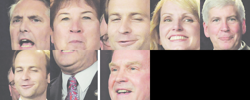

Results found in a-1.png


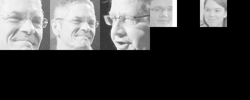

Results found in a-10.png
But there were no faces in that file!
Results found in a-13.png


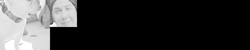

Results found in a-2.png


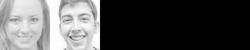

Results found in a-3.png


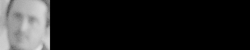

Results found in a-8.png


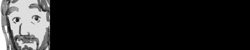

In [22]:
def search_text(word = 'Christopher'):
    
    for dictionary in images:
        if word in dictionary['text']:
            print('Results found in {}'.format(dictionary['file']))
            faces = face_search(dictionary['cv_img'])
            if len(faces) > 0:
                extracted_faces = extract_faces(faces, dictionary['image'])
                draw_contactsheet(extracted_faces)
            else:
                print("But there were no faces in that file!")

search_word = 'Mark'
search_text(search_word)

Results found in a-0.png


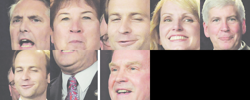

Results found in a-3.png


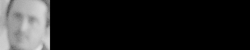

In [16]:
#below are the results when searching for Christopher in the small_images zip folder
search_word = 'Christopher'
search_text(search_word)